# Tutorial 12

In this tutorial we will see how to apply Principal Component Analysis (PCA) on famous Iris Data set. PCA is used in Data Science and Machine Learning Problems to reduce the dimensionality of our feature space. Its application is vast particularly when data sets are large in terms of variables.

### Loading Packages

In [1]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Loading Data in dataframe

In [2]:
iris = datasets.load_iris() #load iris from Scikit learn
df = pd.DataFrame(data = iris.data,columns = iris.feature_names) #make a dataframe 
df["target"] = iris.target #add last column as target

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Bivariate Distribution Plot

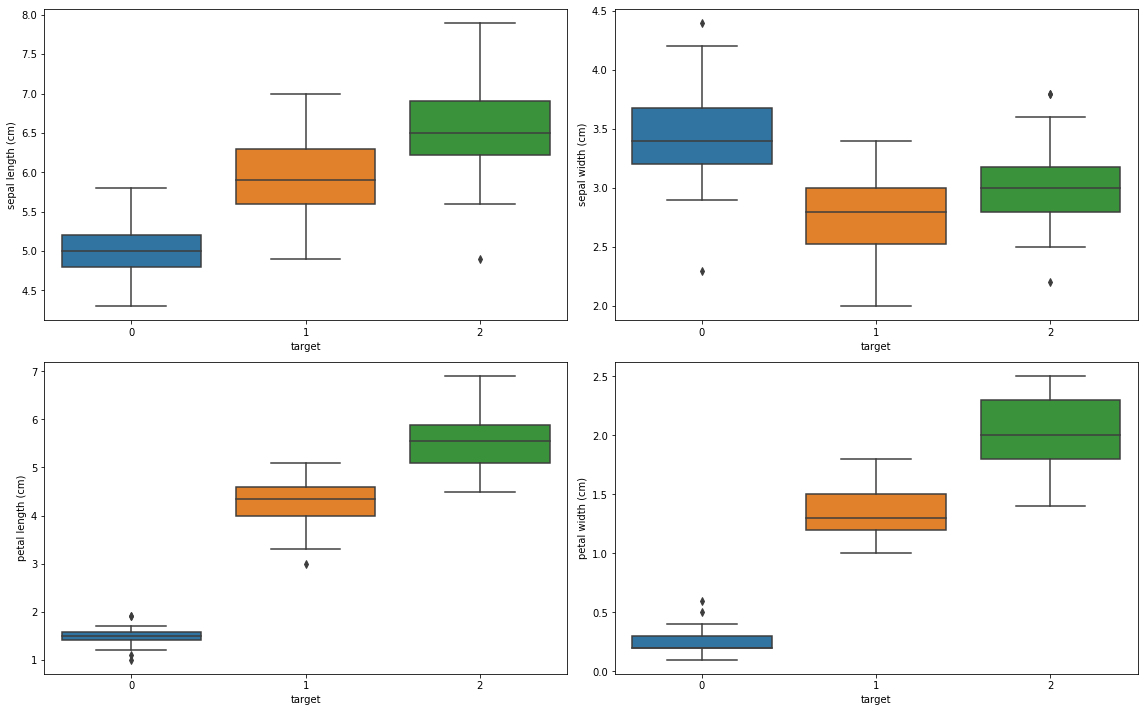

In [5]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['target'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
plt.show()

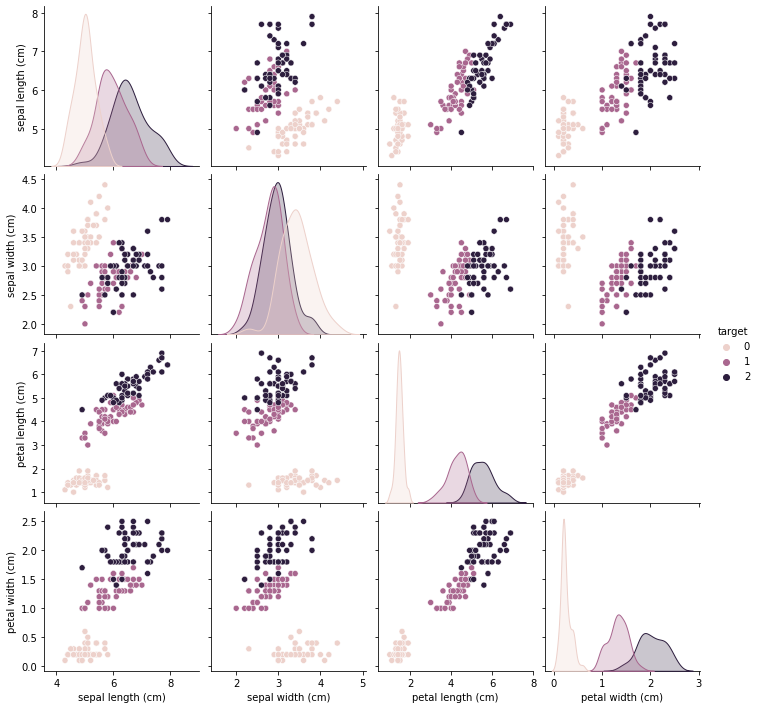

In [6]:
p=sns.pairplot(df, hue = 'target')

### Step 1: Standardize the Data

Since PCA is affected by scale so we should scale the features in our data before applying PCA. We will use StandardScaler from Scikit learn and scale our data to unit scale that is mean = 0 and variance = 1

In [7]:
#seperate target from data
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [8]:
#make and show the standardize data frame
stdf = pd.DataFrame(data = x, columns =iris.feature_names)
stdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Step 2 : PCA Projection to 2D 

I will first project the data to first two components so that we can visualize better and then we will see the results for all the components.

In [9]:
pca = PCA(n_components=2) #creat an instance/object of pca for 2 components only
principalComponents = pca.fit_transform(x) #fit and transform on our data
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2']) #make a dataframe

In [10]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


Notice how our data has been reduced to 2 best components only. Let visualize the data

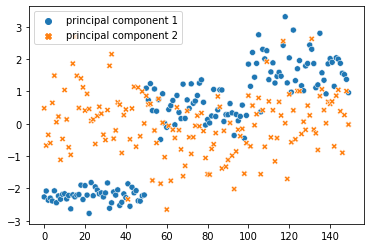

In [18]:
sns.scatterplot(data = principalDf)

### Get the covaraince matrix computation 

In [12]:
pca.get_covariance()

array([[ 0.97819301, -0.10924971,  0.87080719,  0.86106627],
       [-0.10924971,  1.00389019, -0.42723904, -0.38252015],
       [ 0.87080719, -0.42723904,  1.04618124,  0.93698493],
       [ 0.86106627, -0.38252015,  0.93698493,  0.99858119]])

### Check how much variance is explained by each component

In [13]:
variance = pca.explained_variance_ratio_
variance

array([0.72962445, 0.22850762])

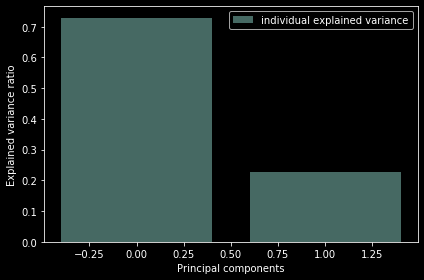

In [14]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(2), variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Interpretation : Principal Component 1 explains 72.96% variation in our data while Principal Component 2 explains 22.85% variation. This adds up to 95.81%. The remaining variance is explained by 2 components not included. But we can use these components in predictive analytics as they capture about 96% of our data variation with only 2 components. Usually the threshold of n is chosen above 90 % or 95 %.

### Visualization of first 3 Components in 3D.

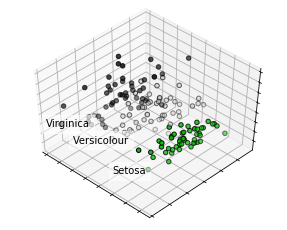

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## END 